In [ ]:
# 没有csv时，执行这段代码，csv会下载到/content/目录

! pip install kaggle
! mkdir ~/.kaggle
! touch ~/.kaggle/kaggle.json

api_token = {"username":"duuuuhe","key":"10066f9acb125582a41d8ce2f2accc99"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rsrishav/youtube-trending-video-dataset
! unzip youtube-trending-video-dataset.zip
! ls -lh /content/*.csv

100% 769M/769M [00:06<00:00, 134MB/s]
100% 769M/769M [00:06<00:00, 123MB/s]
Archive:  youtube-trending-video-dataset.zip
  inflating: BR_category_id.json     
  inflating: BR_youtube_trending_data.csv  
  inflating: CA_category_id.json     
  inflating: CA_youtube_trending_data.csv  
  inflating: DE_category_id.json     
  inflating: DE_youtube_trending_data.csv  
  inflating: FR_category_id.json     
  inflating: FR_youtube_trending_data.csv  
  inflating: GB_category_id.json     
  inflating: GB_youtube_trending_data.csv  
  inflating: IN_category_id.json     
  inflating: IN_youtube_trending_data.csv  
  inflating: JP_category_id.json     
  inflating: JP_youtube_trending_data.csv  
  inflating: KR_category_id.json     
  inflating: KR_youtube_trending_data.csv  
  inflating: MX_category_id.json     
  inflating: MX_youtube_trending_data.csv  
  inflating: RU_category_id.json     
  inflating: RU_youtube_trending_data.csv  
  inflating: US_category_id.json     
  inflating: US_youtu

# import packedges

请把索引import代码放在这里，防止因为命名不一致导致的错误

In [ ]:
! pip install advertools
! pip install tqdm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import sklearn
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
%matplotlib inline
nltk.download('stopwords')
nltk.download('punkt')
import advertools as adv
from tqdm import tqdm
import re

     |████████████████████████████████| 287 kB 5.1 MB/s 
     |████████████████████████████████| 264 kB 34.2 MB/s 
     |████████████████████████████████| 251 kB 39.3 MB/s 
     |████████████████████████████████| 3.1 MB 23.3 MB/s 
     |████████████████████████████████| 3.6 MB 22.8 MB/s 
     |████████████████████████████████| 87 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 74 kB 1.7 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=efb8c186fb48269684b9f6ac5e7dcedd3e36406a42351501906b3cd0a63d58a1
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built PyDispatcher
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   U

# 一、import data


In [ ]:
us_data = pd.read_csv('/content/US_youtube_trending_data.csv')
display(us_data.head())
display(us_data.info())
in_data = pd.read_csv('/content/IN_youtube_trending_data.csv')
display(in_data.head())
display(in_data.info())

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120791 entries, 0 to 120790
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           120791 non-null  object
 1   title              120791 non-null  object
 2   publishedAt        120791 non-null  object
 3   channelId          120791 non-null  object
 4   channelTitle       120791 non-null  object
 5   categoryId         120791 non-null  int64 
 6   trending_date      120791 non-null  object
 7   tags               120791 non-null  object
 8   view_count         120791 non-null  int64 
 9   likes              120791 non-null  int64 
 10  dislikes           120791 non-null  int64 
 11  comment_count      120791 non-null  int64 
 12  thumbnail_link     120791 non-null  object
 13  comments_disabled  120791 non-null  bool  
 14  ratings_disabled   120791 non-null  bool  
 15  description        117339 non-null  object
dtypes: bool(2), int64(5)

None

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114867 entries, 0 to 114866
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           114867 non-null  object
 1   title              114867 non-null  object
 2   publishedAt        114867 non-null  object
 3   channelId          114867 non-null  object
 4   channelTitle       114866 non-null  object
 5   categoryId         114867 non-null  int64 
 6   trending_date      114867 non-null  object
 7   tags               114867 non-null  object
 8   view_count         114867 non-null  int64 
 9   likes              114867 non-null  int64 
 10  dislikes           114867 non-null  int64 
 11  comment_count      114867 non-null  int64 
 12  thumbnail_link     114867 non-null  object
 13  comments_disabled  114867 non-null  bool  
 14  ratings_disabled   114867 non-null  bool  
 15  description        107369 non-null  object
dtypes: bool(2), int64(5)

None

# 二、Data cleaning
1. Data truncation, the value uses the data before 2020.03.20 (convenient for weekly data statistics)
2. Fill empty values

#### Data truncation

In [ ]:
def my_shape_print(source, df):
  print('-----------------', source, '-----------------')
  print ("Rows     : " , df.shape[0]) #Displays numbers of rows .
  print ("Columns  : " , df.shape[1]) # and column our dataset contains.
  print ("\nFeatures : \n", df.columns.tolist())#displays column names
  print ("\nMissing values :  ", df.isnull().sum().values.sum())   #find missing values
  print ("\nUnique values :  \n", df.nunique())  # Count distinct observations

#since the dataset may change i will be creating a subset till 20 March 2022).
us_data=us_data.loc[us_data['publishedAt'] < '2022-03-20']
in_data=in_data.loc[in_data['publishedAt'] < '2022-03-20']
my_shape_print('us_data', us_data)
my_shape_print('in_data', in_data)

----------------- us_data -----------------
Rows     :  118478
Columns  :  16

Features : 
 ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Missing values :   3267

Unique values :  
 video_id              21368
title                 21833
publishedAt           21049
channelId              5352
channelTitle           5437
categoryId               15
trending_date           582
tags                  15679
view_count           115945
likes                 86579
dislikes              13179
comment_count         27432
thumbnail_link        21368
comments_disabled         2
ratings_disabled          2
description           21796
dtype: int64
----------------- in_data -----------------
Rows     :  112412
Columns  :  16

Features : 
 ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',

#### Fill empty values

In [ ]:
us_data.description.fillna('No description provided',inplace=True) 
display('-----us_data------', us_data.isna().sum())

in_data.description.fillna('No description provided',inplace=True) 
in_data.channelTitle.fillna('No description provided',inplace=True) 
display('-----in_data------', in_data.isna().sum())


'-----us_data------'

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

'-----in_data------'

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

## Add category

In [ ]:
def add_category(jsonPath, df):
  print('------------', jsonPath, '------------')
  with open(jsonPath) as file:
    categories = json.load(file)
  file.close()

  category = []
  for cate in categories["items"]:
      category.append([cate["id"],cate["snippet"]["title"]])

  df_category = pd.DataFrame(category, columns=['categoryId','category']) 
  display(df_category)

  df_category.categoryId=df_category.categoryId.astype('int64')

  return df.merge(df_category, on = 'categoryId', how = 'inner')

us_data = add_category('/content/US_category_id.json', us_data)
display('----- us_data -----', us_data.head(5))

in_data = add_category('/content/IN_category_id.json', in_data)
display('----- in_data -----', in_data.head(5))

------------ /content/US_category_id.json ------------


,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


'----- us_data -----'

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87111,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11T17:00:31Z,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12T00:00:00Z,smosh|smosh pit|smosh games|funny|comedy,591837,44168,409,2652,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11T22:00:05Z,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12T00:00:00Z,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955,4511,69,673,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11T23:00:06Z,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12T00:00:00Z,farming|family farm|agriculture|agriculture jo...,277338,37533,197,3666,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs


------------ /content/IN_category_id.json ------------


,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


'----- in_data -----'

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Entertainment
1,4dRHHupQM-s,Naagin 5 | नागिन 5 | Episode 01 | Recap,2020-08-10T04:30:48Z,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24,2020-08-12T00:00:00Z,Naagin 5|Naagin|Season 5|Hina Khan|Dheeraj Dho...,3816680,30086,6786,3733,https://i.ytimg.com/vi/4dRHHupQM-s/default.jpg,False,False,"To save Dev's life, Brinda takes him to a myst...",Entertainment
2,-h9fY8j22yg,Ludo | BakLol Video,2020-08-11T10:32:30Z,UCQfE97UMDGgKCFb7iGM8Btg,BakLol Video,24,2020-08-12T00:00:00Z,funny video|ludo video|funny ludo|ludo players...,837562,21510,2290,1704,https://i.ytimg.com/vi/-h9fY8j22yg/default.jpg,False,False,This is a comedy video just to entertain you.F...,Entertainment
3,oaSgSobLwtQ,FLESH Official Trailer | Eros Now Originals | ...,2020-08-11T07:22:53Z,UCX52tYZiEh_mHoFja3Veciw,Eros Now,24,2020-08-12T00:00:00Z,Flesh|flesh web series|flesh new series|flesh ...,13210819,18787,21210,0,https://i.ytimg.com/vi/oaSgSobLwtQ/default.jpg,True,False,"Presenting the official trailer of FLESH, a bl...",Entertainment
4,1Y2u-05Yhxw,WALL OF DARES WITH BROTHER & SISTER PART 2 | R...,2020-08-11T08:33:04Z,UCaqULAbiq-6ZRlKmx0Uv_Cw,Rimorav Vlogs,24,2020-08-12T00:00:00Z,rimorav|rimorav vlogs|WALL OF DARES WITH BROTH...,1549015,210151,2682,140543,https://i.ytimg.com/vi/1Y2u-05Yhxw/default.jpg,False,False,Watch WALL OF DARES WITH BROTHER & SISTER PART 2,Entertainment


Description
1. There are 15 different categories in US dataset
2. Categoryid 24 'Entertainment' has maximum number of videos, 
3. There are 21368 unique video.
4. There are 5352 unique Channels

## 视频发布时间：年/月/星期

In [ ]:
def add_year_month(df):
  #changing published date , trending_date to datetime datatype.
  df.publishedAt= pd.to_datetime(df.publishedAt)
  df.trending_date= pd.to_datetime(df.trending_date)
  df['Year']=df['publishedAt'].dt.year
  df['Month']=df['publishedAt'].dt.month
  df['Weekday']=df['publishedAt'].dt.weekday

add_year_month(us_data)
display('----us_data-----', us_data.head(5))
add_year_month(in_data)
display('----in_data-----', in_data.head(5))

'----us_data-----'

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,Year,Month,Weekday
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,2020,8,1
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11 20:24:34+00:00,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12 00:00:00+00:00,[None],940036,87111,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,2020,8,1
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11 17:00:31+00:00,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12 00:00:00+00:00,smosh|smosh pit|smosh games|funny|comedy,591837,44168,409,2652,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs,2020,8,1
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11 22:00:05+00:00,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12 00:00:00+00:00,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955,4511,69,673,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,2020,8,1
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11 23:00:06+00:00,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12 00:00:00+00:00,farming|family farm|agriculture|agriculture jo...,277338,37533,197,3666,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,2020,8,1


'----in_data-----'

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,Year,Month,Weekday
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12 00:00:00+00:00,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Entertainment,2020,8,2
1,4dRHHupQM-s,Naagin 5 | नागिन 5 | Episode 01 | Recap,2020-08-10 04:30:48+00:00,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24,2020-08-12 00:00:00+00:00,Naagin 5|Naagin|Season 5|Hina Khan|Dheeraj Dho...,3816680,30086,6786,3733,https://i.ytimg.com/vi/4dRHHupQM-s/default.jpg,False,False,"To save Dev's life, Brinda takes him to a myst...",Entertainment,2020,8,0
2,-h9fY8j22yg,Ludo | BakLol Video,2020-08-11 10:32:30+00:00,UCQfE97UMDGgKCFb7iGM8Btg,BakLol Video,24,2020-08-12 00:00:00+00:00,funny video|ludo video|funny ludo|ludo players...,837562,21510,2290,1704,https://i.ytimg.com/vi/-h9fY8j22yg/default.jpg,False,False,This is a comedy video just to entertain you.F...,Entertainment,2020,8,1
3,oaSgSobLwtQ,FLESH Official Trailer | Eros Now Originals | ...,2020-08-11 07:22:53+00:00,UCX52tYZiEh_mHoFja3Veciw,Eros Now,24,2020-08-12 00:00:00+00:00,Flesh|flesh web series|flesh new series|flesh ...,13210819,18787,21210,0,https://i.ytimg.com/vi/oaSgSobLwtQ/default.jpg,True,False,"Presenting the official trailer of FLESH, a bl...",Entertainment,2020,8,1
4,1Y2u-05Yhxw,WALL OF DARES WITH BROTHER & SISTER PART 2 | R...,2020-08-11 08:33:04+00:00,UCaqULAbiq-6ZRlKmx0Uv_Cw,Rimorav Vlogs,24,2020-08-12 00:00:00+00:00,rimorav|rimorav vlogs|WALL OF DARES WITH BROTH...,1549015,210151,2682,140543,https://i.ytimg.com/vi/1Y2u-05Yhxw/default.jpg,False,False,Watch WALL OF DARES WITH BROTHER & SISTER PART 2,Entertainment,2020,8,1


## 增加Title的字数和表情数


In [ ]:
def add_words_and_emoji_count(df):
  title_word_count_list = []
  title_emoji_count_list = []
  for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['title']:
      words = nltk.word_tokenize(row['title'])  
      title_word_count_list.append(len(words))
      emoji_summary = adv.extract_emoji([row['title']])
      title_emoji_count_list.append(emoji_summary['emoji_counts'][0])
    else:
      title_word_count_list.append(0)
      title_emoji_count_list.append(0)
  df['title_word_count'] = title_word_count_list
  df['title_emoji_count'] = title_emoji_count_list
    
add_words_and_emoji_count(us_data)
add_words_and_emoji_count(in_data)

# 三、Data Describtion


1. There are 118478 rows and 22 columns in the USA dataset and 112360 rows and 22 columns in the India dataset.
2. Qualitative Variables are title,channelId,channelTitle,categoryId are most important attributes for our analysis
3. Quantitative Variables are PublishedAt,trending_date,view_count,likes, dislikes,comment_count
4. Columns tags,thumbnail_link,comments_disabled,ratings_disabled have not particular use in our analysis

In [ ]:
display(us_data.info())
display(in_data.info())

# 四、data visualization

## Top and bottom view_count

In [ ]:
#Select and order top 10 entries
us_data.nlargest(10,'view_count') 

In [ ]:
#Select and order bottom 10 entries.
us_data.nsmallest(10, 'view_count')  

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_x,Year,Month,Weekday,category_y
4122,mCY4b6GGkb4,The Funeral of The Duke of Edinburgh,2021-04-17 14:56:38+00:00,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2021-04-18 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/mCY4b6GGkb4/default.jpg,True,True,The Funeral procession and service for His Roy...,People & Blogs,2021,4,5,People & Blogs
35008,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25 01:40:31+00:00,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-27 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4257,...,240,https://i.ytimg.com/vi/r7nYQXsxJdU/default.jpg,False,False,HBCU Homecoming 2020 is going down! We welcome...,Entertainment,2020,10,6,Entertainment
35065,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25 01:40:31+00:00,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-29 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4420,...,261,https://i.ytimg.com/vi/r7nYQXsxJdU/default.jpg,False,False,HBCU Homecoming 2020 is going down! We welcome...,Entertainment,2020,10,6,Entertainment
45441,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25 21:04:38+00:00,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-27 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,785,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate...",Entertainment,2021,6,4,Entertainment
45442,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26 00:07:19+00:00,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-27 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,138,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov...",Entertainment,2021,6,5,Entertainment
45488,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25 21:04:38+00:00,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-28 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,784,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate...",Entertainment,2021,6,4,Entertainment
45490,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26 00:07:19+00:00,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-28 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,132,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov...",Entertainment,2021,6,5,Entertainment
45543,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25 21:04:38+00:00,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-29 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate...",Entertainment,2021,6,4,Entertainment
45546,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26 00:07:19+00:00,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-29 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,147,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov...",Entertainment,2021,6,5,Entertainment
45595,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25 21:04:38+00:00,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-30 00:00:00+00:00,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,...,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate...",Entertainment,2021,6,4,Entertainment


In [ ]:
#us_data.groupby(['Year'])['channelId'].count()## channelid变化趋势，20和22年数据少先去掉
#sns.distplot(np.log1p(movies_train_df['runtime'].fillna(0)))

## 1. The number of likes per video in last time and first time 

#### it is can show the dynamic changes of likes ，the number of comment and the number of view of each video


In [ ]:
#@title
agg_func_selection = {'likes': ['first', 'last'],'comment_count': ['first', 'last'],'view_count':['first', 'last']}
us_data.sort_values(by=['video_id'],ascending=False).groupby(['video_id']).agg(agg_func_selection).head(5)




likes         comment_count        view_count          
              first    last         first   last      first      last
video_id                                                             
--14w5SOEUs  232455  218568         15743  15442    4690242   3963014
--2O86Z0hsM   16978   16829          1362   1433     519009    506401
--40TEbZ9Is    7831    8029           706    723     663938    682609
--DKkzWVh-E   29991   18445           998    612     623949    320130
--FmExEAsM8  765457  810589         49743  52092   30906926  31967789

## 2. What is channel title distribution in USA and India？
#### Use the bar chart to display the totals and distributions for each channel title in the two countries.
 

- In USA，NFL is the most popular channel title with over 800 videos, followed by NBA and SSSniperWolf
- In India,Vijay Television is the most popular channel title, with nearly 400 more videos than colors TV, while colors TV and ZEES are more popular in India.
- The channel titles that the two countries like are very different, to be specific, their top three and bottom three are completely different.

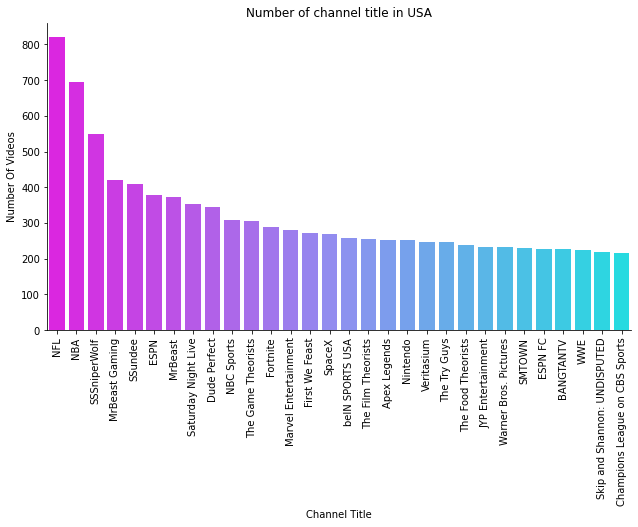

In [ ]:
#@title
# gives us various count of video in each channel category
channelTitle_count = us_data.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(30)

sns.catplot(data=channelTitle_count, x='channelTitle', y='video_count',kind='bar',palette='cool_r' ,ci=None, legend_out=False,aspect =2)

plt.ylabel('Number Of Videos')
plt.xlabel('Channel Title')
plt.title("Number of channel title in USA")
plt.xticks(rotation=90)
plt.show()

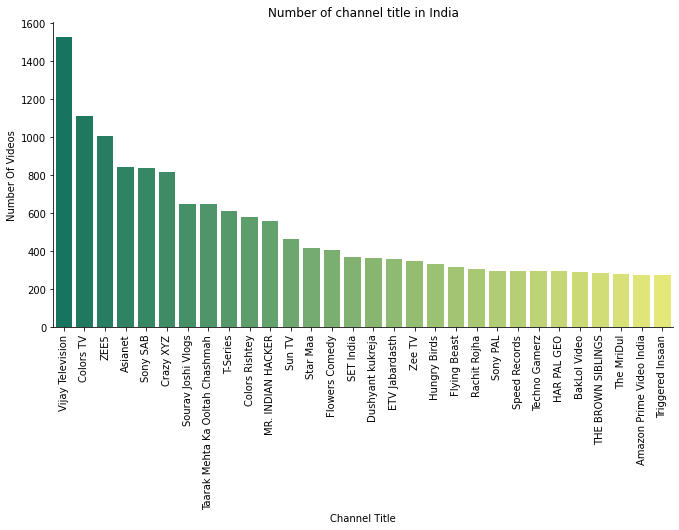

In [ ]:
#@title
# gives us various count of video in each channel category
channelTitle_count = in_data.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(30)

sns.catplot(data=channelTitle_count, x='channelTitle', y='video_count',kind='bar',palette='summer' ,ci=None, legend_out=False,aspect =2)
plt.ylabel('Number Of Videos')
plt.xlabel('Channel Title')
plt.title("Number of channel title in India")
plt.xticks(rotation=90)
plt.show()

## 3.How many videos each categories has?
#### this plot uses bar chart to show the comparison of the number of the vedio per categories in USA and India, the dark one symbol for India and the  light one means USA

-  America's favorite genres are entertainment, games and music, and Indians' favorite entertainment, music, people & blog.
-  Nonprofits & Activisim are the least viewed in both countries. 
-  The most popular categories in the United States and India are entertainment videos, and the number of entertainment videos in India is nearly 2 times that of the United States.Music is also a category that people in both countries like.
-  It can be seen that Americans are very interested in game videos. The favorite is significantly higher than that of Indians in the top 3, which is nearly three times the number of viewings in India.

Text(0.5, 1.0, 'Number of videos  in USA and Indian')

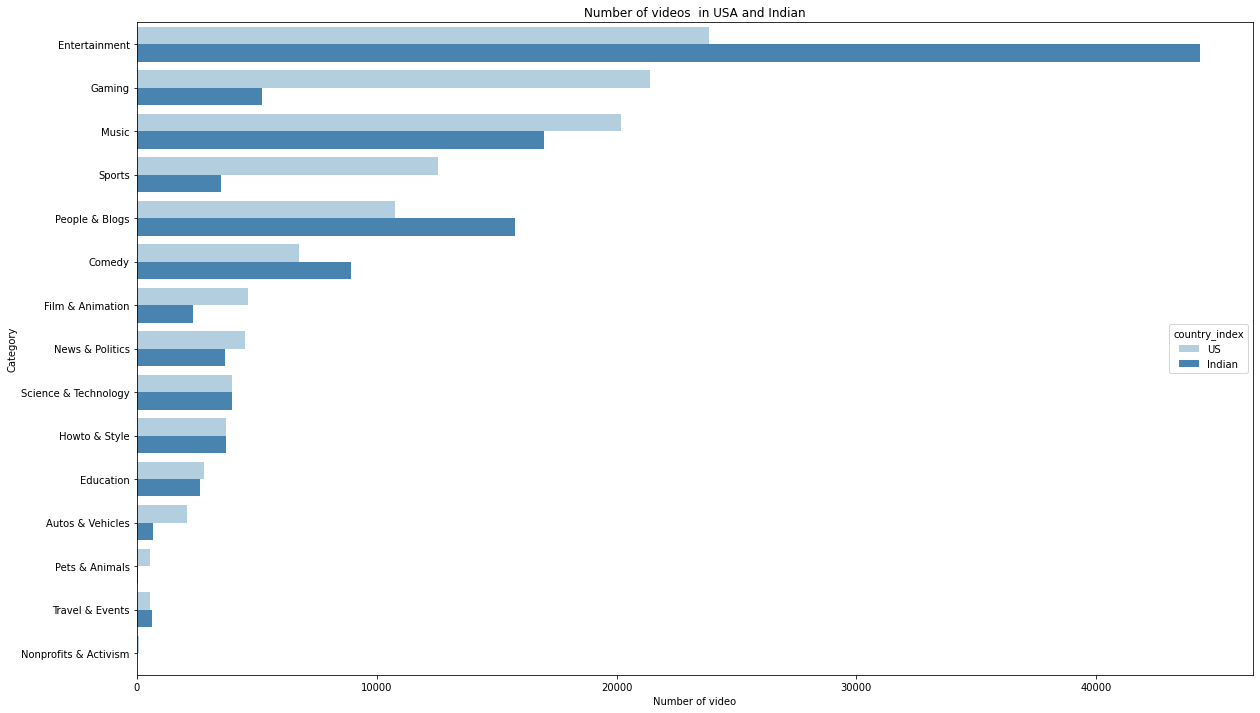

In [ ]:
#@title
# 美国的不同类型视频的对比
us_data_category_count = us_data.groupby("category").size().reset_index(name="num_of_category").sort_values("num_of_category", ascending=False)#.head(10)
us_data_category_count['country_index']="US"
in_data_category_count = in_data.groupby("category").size().reset_index(name="num_of_category").sort_values("num_of_category", ascending=False)#.head(10)
in_data_category_count['country_index']="Indian"
#conbine_category = pd.merge(us_data_category_count,in_data_category_count ,')
conbine_category = pd.concat([us_data_category_count,in_data_category_count]) 

fig, ax = plt.subplots(figsize=(20,12))
sns.barplot(x="num_of_category", y="category", hue="country_index", data=conbine_category, palette = "Blues",orient='h')
plt.ylabel('Category')
plt.xlabel('Number of video')
plt.title("Number of videos  in USA and Indian",fontsize='large')

## 4. US and India YouTube trending monthly distribution
#### Use the bar chart to reflect the YouTube trending monthly distribution in the USA and India. The horizontal axis represents the month, and the vertical axis represents the proportion of the list.


- In the U.S. and India, both the beginning and end of the year are peak periods for YouTube trending, and the trends are the same in both countries. 
- April, May, June, and July are all months with fewer videos in YouTube trending. January, September, October, and December are all months with more YouTube trending videos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of videos per month in Indian')

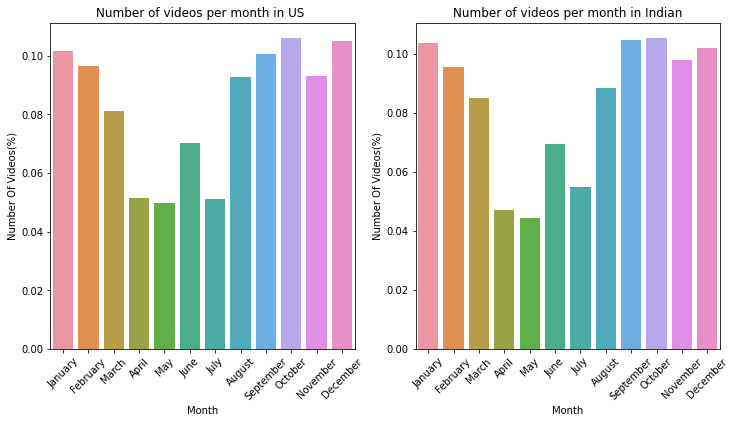

In [ ]:
#@title
get_month_us=us_data.Month.value_counts(normalize=True)
get_month_in=in_data.Month.value_counts(normalize=True)


# sns.set_context({"figure.figsize":(10, 10)})
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(get_month_us.index,get_month_us)
plt.gca().set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'],rotation='45')
plt.ylabel('Number Of Videos(%)')
plt.xlabel('Month')
plt.title("Number of videos per month in US ")

plt.subplot(1,2,2)
# sns.set_context({"figure.figsize":( 10, 10)})
sns.barplot(get_month_in.index,get_month_in)
plt.gca().set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'],rotation='45')
plt.ylabel('Number Of Videos(%)')
plt.xlabel('Month')
plt.title("Number of videos per month in Indian")

#df_india.groupby('month').count_max_view

## 5. Number of view of videos per month
#### Use scatter plots to compare the maximum and minimum views of different videos and the distribution of views in each month 

- Both the U.S. and India saw more views overall in August, and both saw the most viewed video of the year in May
- The month with generally less streaming in the US is January; India is February
- In the United States, August has the highest dispersion of broadcasts and January the lowest; in India, August has the highest dispersion of broadcasts, and February and December are relatively concentrated

<Figure size 864x432 with 0 Axes>

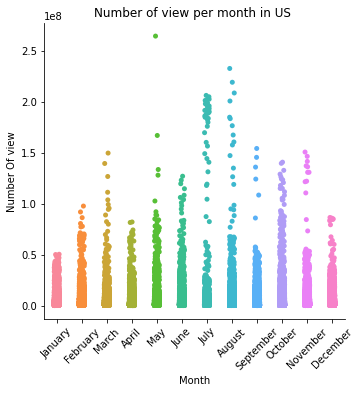

<Figure size 864x432 with 0 Axes>

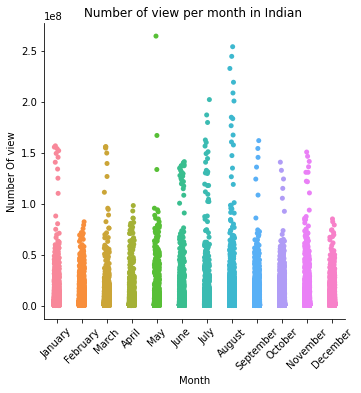

In [ ]:
#@title
## le8指的是*100000000（8个0），le7指的是*10000000（7个0），纵坐标使用了科学计数法
plt.figure(figsize=(12,6))
sns.catplot(x='Month',y="view_count",data=us_data)
plt.gca().set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'],rotation='45')
plt.ylabel('Number Of view')
plt.xlabel('Month')
plt.title("Number of view per month in US ")
plt.show()

plt.figure(figsize=(12,6))
sns.catplot(x='Month',y="view_count",data=in_data)
plt.gca().set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'],rotation='45')
plt.ylabel('Number Of view')
plt.xlabel('Month')
plt.title("Number of view per month in Indian ")
plt.show()

## 6.Number of YouTube trending videos per week
#### Count the number of videos published on YouTube Trending by two countries each week, and use the bar chart to display

- The number of videos in the United States fluctuates greatly during the week, with the highest number of videos on the list on Friday and the least number of videos on the list on Saturday
- India's intra-week distribution fluctuates less, and as in the United States, Friday is the day with the most videos on the list, but the day with the least is Monday.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of videos per month in Indian')

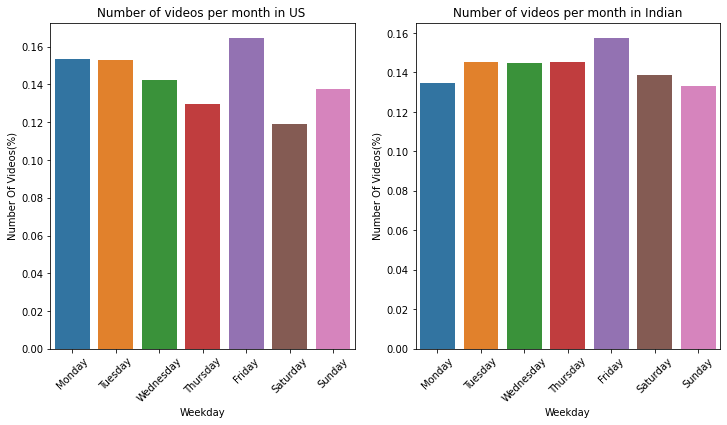

In [ ]:
#@title
get_weekday_us=us_data.Weekday.value_counts(normalize=True)
get_weekday_in=in_data.Weekday.value_counts(normalize=True)


# sns.set_context({"figure.figsize":(10, 10)})
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(get_weekday_us.index,get_weekday_us)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.ylabel('Number Of Videos(%)')
plt.xlabel('Weekday')
plt.title("Number of videos per month in US ")

plt.subplot(1,2,2)
# sns.set_context({"figure.figsize":( 10, 10)})
sns.barplot(get_weekday_in.index,get_weekday_in)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.ylabel('Number Of Videos(%)')
plt.xlabel('Weekday')
plt.title("Number of videos per month in Indian")

#df_india.groupby('month').count_max_view

## 7. Number of view of videos per week
- The most weekly video views in the United States and India are on Fridays and the most discrete distribution; the most concentrated average views are on Mondays
- Weekly viewing fluctuations and dispersion are similar in the US and India

<Figure size 864x432 with 0 Axes>

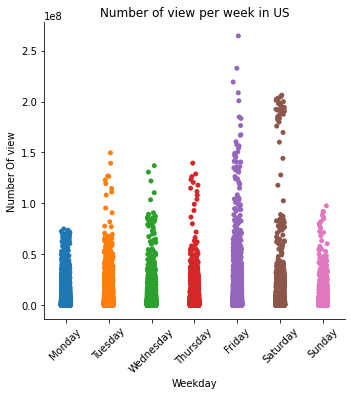

<Figure size 864x432 with 0 Axes>

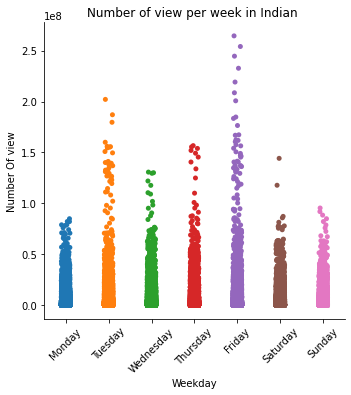

In [ ]:
#@title
plt.figure(figsize=(12,6))
sns.catplot(x='Weekday',y="view_count",data=us_data)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.title("Number of view per week in US ")
plt.ylabel('Number Of view')
plt.xlabel('Weekday')
plt.title("Number of view per week in US")
plt.show()


plt.figure(figsize=(12,6))
sns.catplot(x='Weekday',y="view_count",data=in_data)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.ylabel('Number Of view')
plt.xlabel('Weekday')
plt.title("Number of view per week in Indian ")
plt.show()

##  8. the max,mean,mini view of trending comparison
#### using line chart compares the dynamic change between two countries from 2020.08 to 2022.05
- Over time, the playback volume of the video is not much different between the maximum and the average.
- On the data, you can see that the average and maximum playback volume of late March and early April suddenly became very large
- Both the US and India have significant play peaks in September 2020 and late March 2022, and India has a peak in June 2021

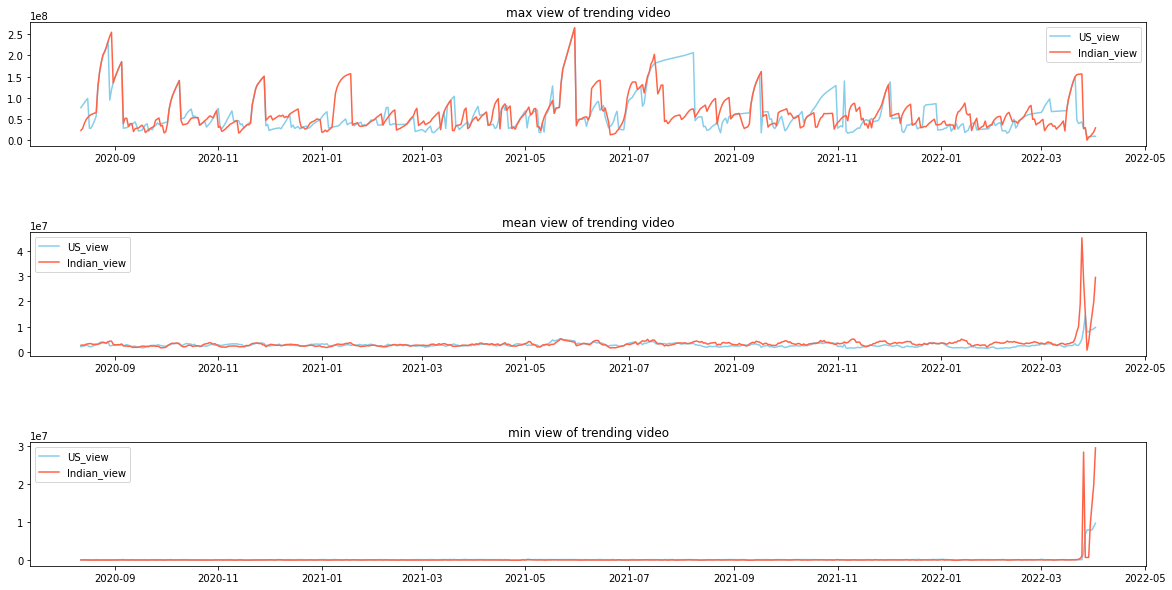

In [ ]:
#@title
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=0.7)
# view_count 最大值随着时间
trending_date_view =us_data.groupby(['trending_date'],as_index=False).agg({'view_count':'max'}).rename(columns={'view_count':'US_view'})
trending_date_view_2 =in_data.groupby(['trending_date'],as_index=False).agg({'view_count':'max'}).rename(columns={'view_count':'Indian_view'})
plt.subplot(3,1,1)
#plt.ticklabel_format(style='plain')
plt.title('max view of trending video') 
plt.plot( 'trending_date', 'US_view', data=trending_date_view,  markerfacecolor='steelblue', color='skyblue', ) 
plt.plot(  'trending_date', 'Indian_view', data=trending_date_view_2,  color='tomato') 
plt.legend()

# view_count 平均随着时间
trending_date_view =us_data.groupby(['trending_date'],as_index=False).agg({'view_count':'mean'}).rename(columns={'view_count':'US_view'})
trending_date_view_2 =in_data.groupby(['trending_date'],as_index=False).agg({'view_count':'mean'}).rename(columns={'view_count':'Indian_view'})
plt.subplot(3,1,2)
#plt.ticklabel_format(style='plain')
plt.title('mean view of trending video') 
plt.plot( 'trending_date', 'US_view', data=trending_date_view,  markerfacecolor='steelblue', color='skyblue', ) 
plt.plot(  'trending_date', 'Indian_view', data=trending_date_view_2,  color='tomato') 
plt.legend()


# view_count 最小值随着时间
trending_date_view =us_data.groupby(['trending_date'],as_index=False).agg({'view_count':'min'}).rename(columns={'view_count':'US_view'})
trending_date_view_2 =in_data.groupby(['trending_date'],as_index=False).agg({'view_count':'min'}).rename(columns={'view_count':'Indian_view'})
plt.subplot(3,1,3)
#plt.ticklabel_format(style='plain')
plt.title('min view of trending video') 
plt.plot( 'trending_date', 'US_view', data=trending_date_view,  markerfacecolor='steelblue', color='skyblue', ) 
plt.plot(  'trending_date', 'Indian_view', data=trending_date_view_2,  color='tomato') 
plt.legend()

## 9. Changes in categories over time
#### Heatmap of different categories over time in the US and India
- In the U.S., entertainment, filmfilm&animation animation and music are the most popular, and the popularity of music has weakened recently
- In India, entertainment and music are also very popular, and entertainment has become more and more popular in recent years, and the popularity of music has weakened

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


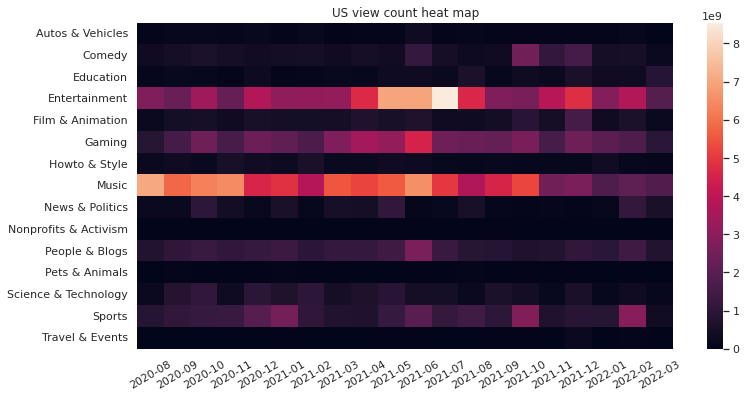

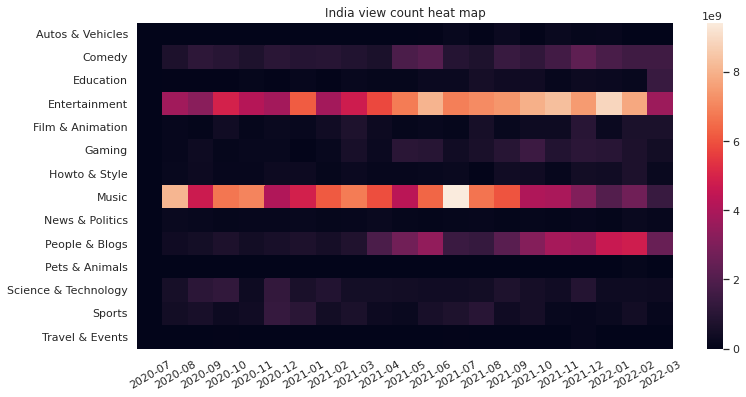

In [ ]:
#@title
# 热力图
def heat_map_plot(title, df):
  df_view_category_hot_map = df.groupby([df['publishedAt'].dt.to_period('m'), 'category']).sum()
  df_view_category_hot_map = df_view_category_hot_map[['view_count']]
  df_view_category_hot_map.reset_index(inplace=True)
  df_new = df_view_category_hot_map.pivot_table(index='category', columns='publishedAt', values='view_count', fill_value=0)
  df_new.reset_index(inplace=True)

  df_new_plot = df_new.drop(["category"], axis = 1)
  fig, ax = plt.subplots(figsize=(12,6))
  sns.heatmap(df_new_plot,ax=ax)
  ax.set_yticklabels(df_new.category.values, rotation=0)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
  ax.set_title(title)
  x_axis = ax.axes.get_xaxis()
  x_axis.get_label().set_visible(False)
  plt.show()

heat_map_plot('US view count heat map', us_data)
heat_map_plot('India view count heat map', in_data)


## 10. view_count with outliers and no outliers
When calculating the correlation, we need to delete outliers and eliminate interference
- reference：
https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/  
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Kwak, S. K., & Kim, J. H. (2017). Statistical data preparation: management of missing values and outliers. Korean journal of anesthesiology, 70(4), 407.

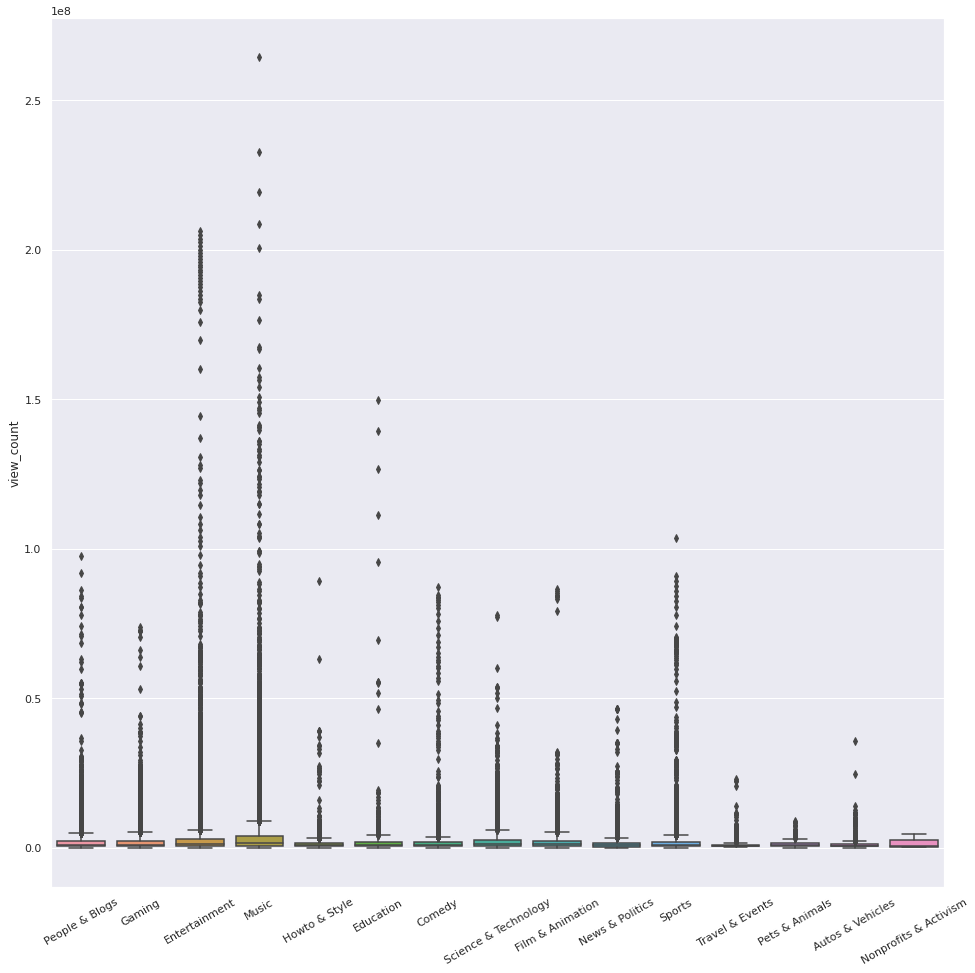

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(16,16))
sns.boxplot(x="category", y="view_count", data=us_data, ax=ax)

#ax.set_title(title)
x_axis = ax.axes.get_xaxis()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

x_axis.get_label().set_visible(False)
plt.show()

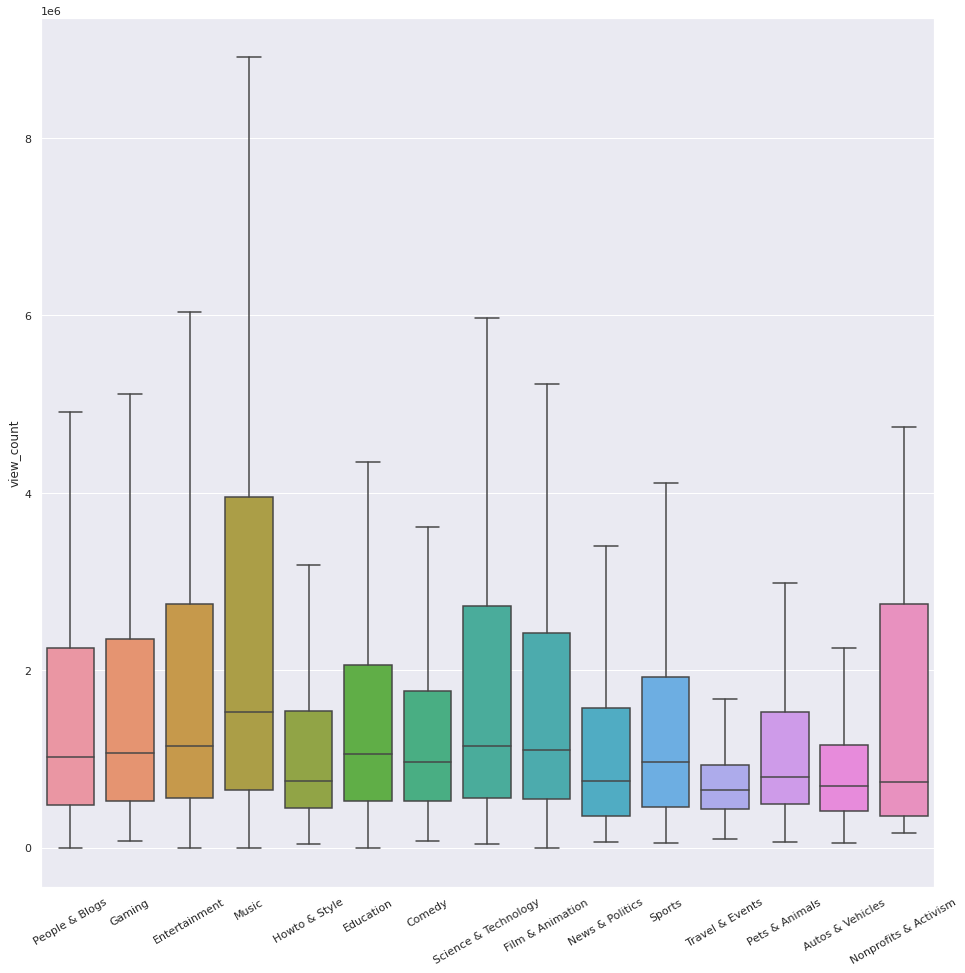

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(16,16))
sns.boxplot(x="category", y="view_count", data=us_data, ax=ax, showfliers = False)

#ax.set_title(title)
x_axis = ax.axes.get_xaxis()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

x_axis.get_label().set_visible(False)
plt.show()

## 11.Correlation analysis between different columns
- In the United States, likes has the greatest impact on view_count, which is positively correlated; in addition, dislike and comment_count also have a certain impact, which is a positive correlation
- In India, view_count and like also have a strong positive correlation, and comment_count also has a relatively high correlation with view_count and like
- It can be found that dislike has little effect on other factors in India, but the opposite is true in the United States


Features correlation:
Target: view_count
Reference.: -0.5

Main features:
categoryId -0.05
likes 0.85
dislikes 0.66
comment_count 0.52
comments_disabled 0.00
ratings_disabled 0.01
Year -0.02
Month 0.01


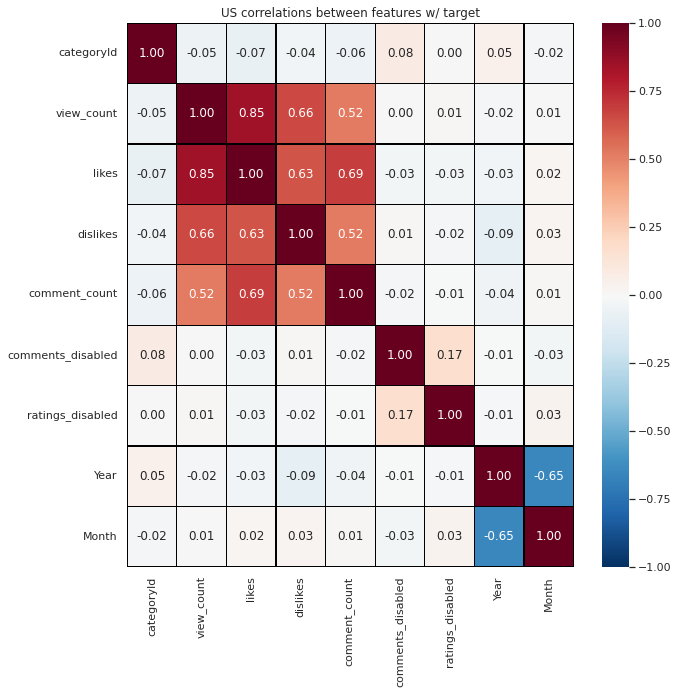


Features correlation:
Target: view_count
Reference.: -0.5

Main features:
categoryId -0.13
likes 0.81
dislikes 0.15
comment_count 0.49
comments_disabled 0.00
ratings_disabled 0.03
Year 0.03
Month -0.00


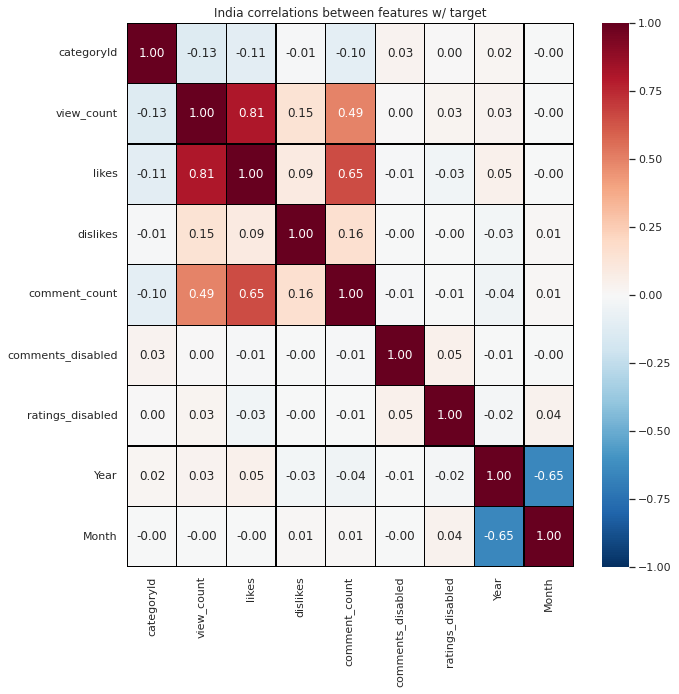

['categoryId',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'Year',
 'Month']

In [ ]:
#@title
def correlation(df, varT, title, xpoint=-0.5, showGraph=True):
    corr = df.corr()
    print(f'\nFeatures correlation:\n'
          f'Target: {varT}\n'
          f'Reference.: {xpoint}\n'
          f'\nMain features:')
    corrs = corr[varT]
    features = []
    for i in range(0, len(corrs)):
        if corrs[i] > xpoint and corrs.index[i] != varT:
            print(corrs.index[i], f'{corrs[i]:.2f}')
            features.append(corrs.index[i])
    if showGraph:
        f, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(corr,
                    annot=True, fmt='.2f', vmin=-1, vmax=1, linewidth=0.01,
                    linecolor='black', cmap='RdBu_r'
                    )
        plt.title(title + ' correlations between features w/ target')
        plt.show()
    return features

correlation(us_data, 'view_count', 'US')
correlation(in_data, 'view_count', 'India')

## 12.Comparison of dislikes and likes and the number of views in two countries
#### According to the above figure, it can be seen that the correlation between view_count and dislike in the two countries is quite different. Here, the linear regression model is used to separately explore the relationship between the number of views and likes and dislikes in the two countries
- In linear regression, the correlation between US video views and dislike is 0.661; but India is only 0.148, and India has a high dislike dispersion in the chart
- The number of views in the United States and India has a strong correlation with likes, both exceeding 0.8, which is a strong correlation

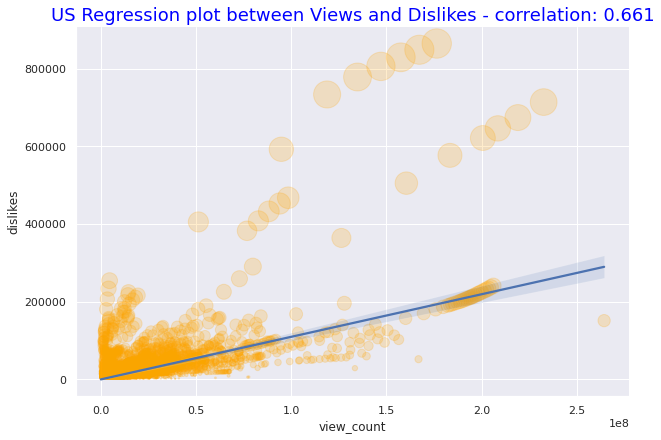

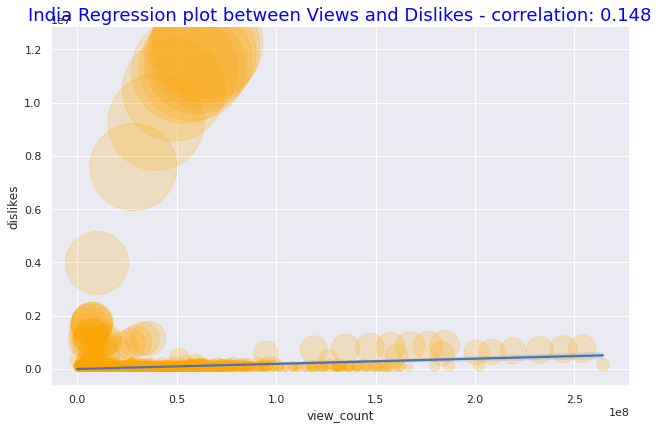

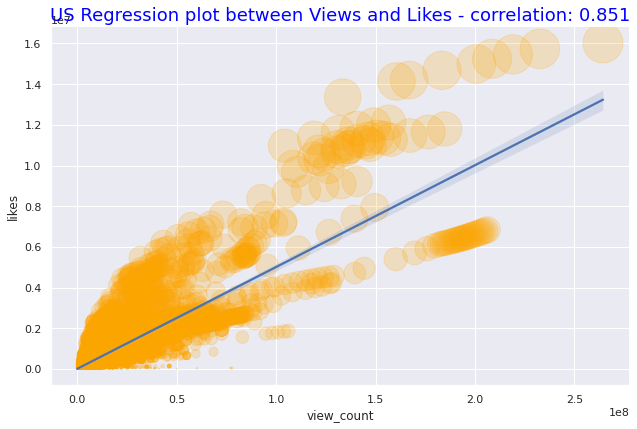

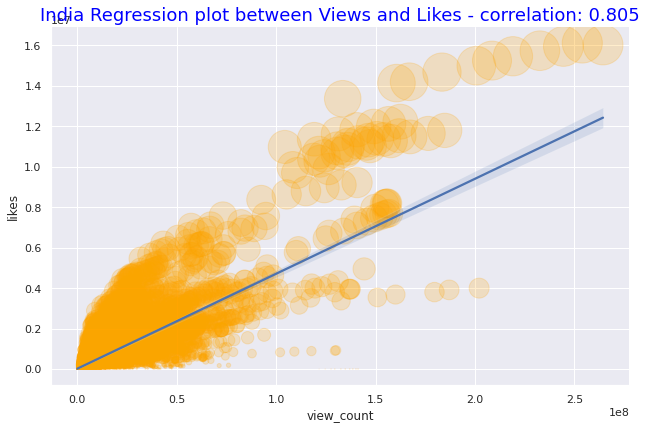

In [ ]:
#@title
def dislikes_lmplot(sub_df, source):
  new_df = sub_df.sort_values(by='dislikes', ascending=False)

  corr = new_df.dislikes[1:].corr(new_df.view_count[1:])

  sns.lmplot(data=new_df.iloc[1:], x='view_count', 
            y='dislikes', 
            scatter_kws={'color':'orange', 'alpha':0.2, 's':new_df.iloc[1:].dislikes/1000},
            height=6, aspect=1.5)
  plt.title(f"{source} Regression plot between Views and Dislikes - correlation: {corr:.3f}", fontdict={'size':18, 'color':'blue'})
  plt.show()

def like_lmplot(sub_df, source):
  corr = sub_df.likes.corr(sub_df.view_count)

  sns.lmplot(data=sub_df, x='view_count', 
            y='likes', 
            scatter_kws={'color':'orange', 'alpha':0.2, 's':sub_df.likes/10000},
            height=6, aspect=1.5)
  plt.title(f"{source} Regression plot between Views and Likes - correlation: {corr:.3f}", fontdict={'size':18, 'color':'blue'})
  plt.show()

dislikes_lmplot(us_data, 'US')
dislikes_lmplot(in_data, 'India')
like_lmplot(us_data, 'US')
like_lmplot(in_data, 'India')

## 13. Topic Concentration Comparison Close



In [ ]:
#@title
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['title', 'tags']:    
        data[col] = data[col].apply(clean_sentence)
    
    return data

def removeOutliers(out, varTarget):
    print('\nOutliers\nRemoving ...', end='')
    cidgrp = out[varTarget]
    print('..', end='')
    # quantiles
    qtl1 = cidgrp.quantile(.25)  
    qtl3 = cidgrp.quantile(.75)
    print('..', end='')
    # calculating iqr
    iqr = qtl3 - qtl1
    print('..', end='')

    # creating limits
    baixo = qtl1 - 1.5 * iqr
    alto = qtl3 + 1.5 * iqr
    print('..', end='')

    # removing outliers
    novodf = pd.DataFrame()
    print('..', end='')

    limites = out[varTarget].between(left=baixo, right=alto, inclusive=True)
    novodf = pd.concat([novodf, out[limites]])

    print('.....Done')

    return novodf


df_us_title_data = clean_dataframe(removeOutliers(us_data,'view_count'))
df_us_title_data.head(5)



Outliers
Removing ..................Done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,category,Year,Month,Weekday,title_word_count,title_emoji_count
0,3C66w5Z0ixs,asked girlfriend,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadisprankbasketballskitsghostfunny videosv...,1514614,156908,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,2020,8,1,8,0
1,49Z6Mv4_WCA,dont know anymore,2020-08-11 20:24:34+00:00,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12 00:00:00+00:00,none,940036,87111,...,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,2020,8,1,8,0
2,nt3VVyv5pxQ,try laugh challenge 51,2020-08-11 17:00:31+00:00,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12 00:00:00+00:00,smoshsmosh pitsmosh gamesfunnycomedy,591837,44168,...,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs,2020,8,1,7,0
3,BNeDH6UTmXw,ten minutes tyler cameron qa,2020-08-11 22:00:05+00:00,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12 00:00:00+00:00,bachelorthe bachelorettetyler ctyler cameronty...,105955,4511,...,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,2020,8,1,9,0
4,gPdUslndvVI,farm got destroyed,2020-08-11 23:00:06+00:00,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12 00:00:00+00:00,farmingfamily farmagricultureagriculture jobsm...,277338,37533,...,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,2020,8,1,5,0


2022-04-02 06:05:35,663 | INFO | word2vec.py:1567 | scan_vocab | collecting all words and their counts
2022-04-02 06:05:35,668 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-02 06:05:35,719 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #10000, processed 55184 words, keeping 3719 word types
2022-04-02 06:05:35,757 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #20000, processed 120569 words, keeping 5553 word types
2022-04-02 06:05:35,791 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #30000, processed 182040 words, keeping 7000 word types
2022-04-02 06:05:35,837 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #40000, processed 253471 words, keeping 9170 word types
2022-04-02 06:05:35,873 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #50000, processed 321365 words, keeping 10835 word types
2022-04-02 06:05:35,919 | INFO | word2vec.py:

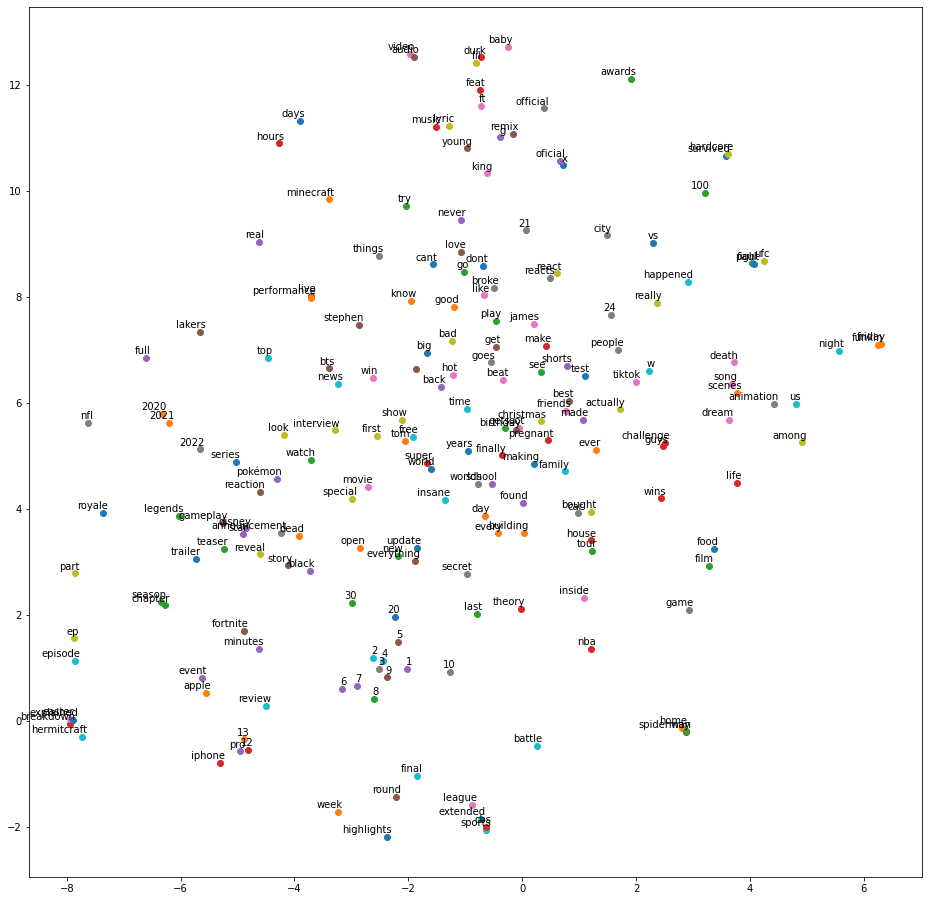

In [ ]:
#@title
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data['title'].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()




us_corpus = build_corpus(df_us_title_data)
model = word2vec.Word2Vec(us_corpus, size=100, window=20, min_count=400, workers=4)
tsne_plot(model)



In [ ]:
#sub_df = in_data.groupby('title')[['view_count', 'likes', 'dislikes','comment_count']].max()

## 14. Comparison of the number of Title text and the number of expressions
#### Use stacked line chart to compare the number of text and emoji in US and Indian headers
- US and Indian video titles are written with extra emojis
- Indian titles are longer than US with text and emojis
- The U.S. uses a higher density of text and symbol titles than India

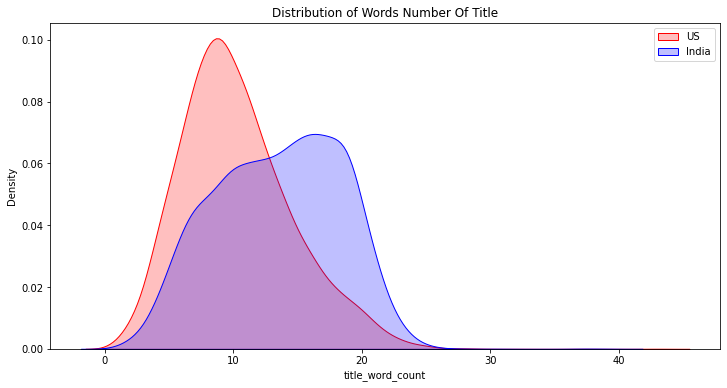

In [ ]:
#@title
plt.figure(figsize=(12,6))
p1=sns.kdeplot(us_data['title_word_count'], shade=True, bw_adjust=2, color="r", label='US').set_title('Distribution of Words Number Of Title')
p1=sns.kdeplot(in_data['title_word_count'], shade=True, bw_adjust=2, color="b", label='India')
plt.legend()

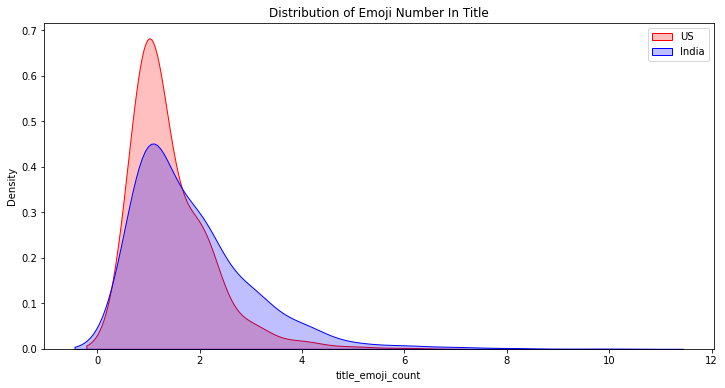

In [ ]:
#@title
#90%标题中表情数量都是0，这里过滤掉，否则图很难看
df_us_emoji_count = us_data[us_data['title_emoji_count'] != 0]
df_in_emoji_count = in_data[in_data['title_emoji_count'] != 0]

plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_us_emoji_count['title_emoji_count'], shade=True, bw_adjust=3, color="r", label='US').set_title('Distribution of Emoji Number In Title')
p1=sns.kdeplot(df_in_emoji_count['title_emoji_count'], shade=True, bw_adjust=3, color="b", label='India')
plt.legend()

## 15.Comparison of word frequency between the two countries


- The description of the tag will be cleaner than the words of the description, and it will be more able to show hot topics
- The most famous tag in America is among us; the most popular describtion is discord, gg, twitch and TV
- The most popular video tags in India are music-related words such as new song, punjabi song, etc.
At the same time, the most popular video description words in India are free, fire, etc., which also reflects the status quo of Indian society.

In [ ]:
#@title
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [ ]:
#@title
def word_cloud_vis (col, df, title):
  ResAN = ' '.join(df[col].tolist())
  ResAN = ' '.join(df[col].tolist()) # change all rows to list, join" ". a long straing and put together
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  stopwords = set(STOPWORDS)
  stopwords.update(['facebook', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'facebook', 'youtube', 'videos', 'video','bitly','googl',\
                  'google','bit','https', 'follow' ,'channel', 'share',  'comment','playlist', 'list', 'like','dislike', 'take', 'go', 'got', 'back',\
                  'watch','much', 'made', 'keep', 'watch','none', 'check', 'will', 'make'])

  wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(ResAN)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.margins(x=0, y=0)
  plt.title( title +' popular '+col,size=24)
  plt.show();

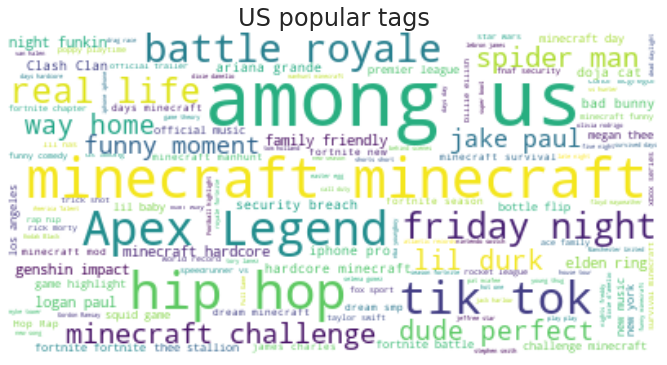

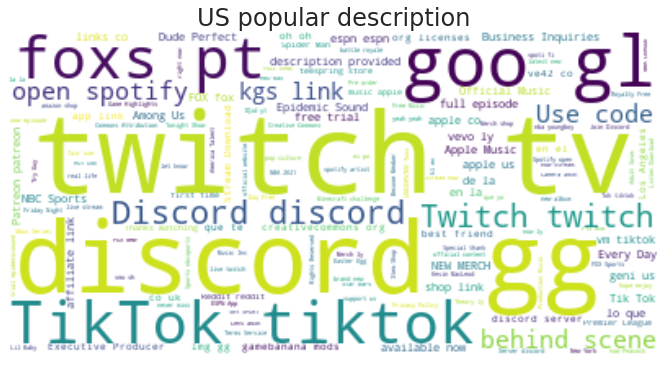

In [ ]:
#@title
word_cloud_vis ('tags', us_data, 'US')
word_cloud_vis ('description', us_data, 'US')

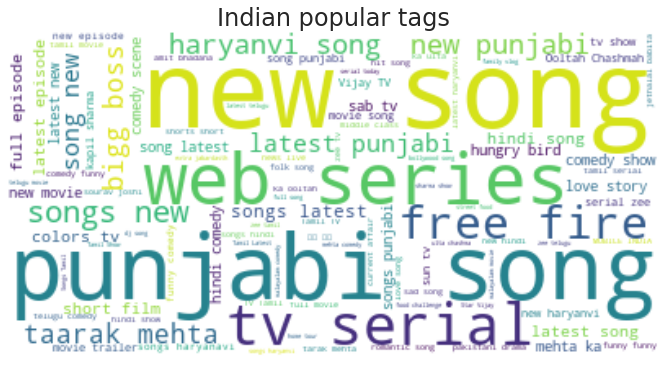

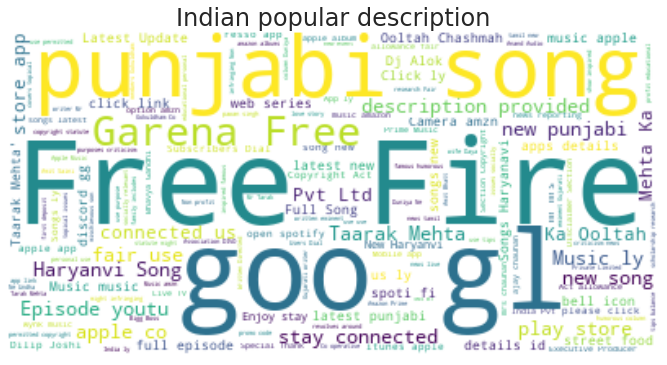

In [ ]:
#@title
word_cloud_vis ('tags', in_data, 'Indian')
word_cloud_vis ('description', in_data, 'Indian')


## 16. Predict the relationship between trending day and a numerical variable
#### You can see the impact of the relationship between view_count', 'likes', 'dislikes', 'comment_count' and date on trending day
and predict trending day through these numerical variables

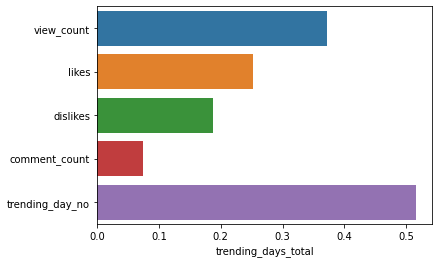

In [ ]:
#@title
# 抽取相关的视频，日期信息，以及想要调查view_count,likes,dislikes,comment_count这些数值类型的变量的关系
Trend_day_predict = us_data.groupby(['video_id','trending_date','publishedAt'],as_index=False).agg({'view_count':'max','likes':'max','dislikes':'max','comment_count':'max'})
Trending_day_total = Trend_day_predict 
# 转化为 datetime 格式
Trending_day_total['trending_date'] = pd.to_datetime(Trending_day_total['trending_date'])
Trending_day_total['publishedAt'] = pd.to_datetime(Trending_day_total['publishedAt'])
## 按出现时间顺序对每一组video_id进行编号,第一次出现编号1，第二次出现编号2，以此类推。
Trending_day_total['trending_day_no'] = Trending_day_total.groupby(['video_id'])["trending_date"].rank('first',ascending=True) 
## 计算总持续时间
Trending_day_count = Trending_day_total.groupby('video_id',as_index=False)["trending_date"].count().rename(columns={'trending_date':'trending_days_total'})
## 合并总持续时间和时间顺序
Trending_day_total = Trending_day_total.merge(Trending_day_count, left_on='video_id', right_on='video_id')
# 相关关系
Trending_day_corr = Trending_day_total.corr()
Trending_day_corr = Trending_day_corr[['trending_days_total']]
Trending_day_corr = Trending_day_corr.drop('trending_days_total',axis=0)
sns.barplot(x=Trending_day_corr['trending_days_total'], y=Trending_day_corr.index ,orient = 'h')

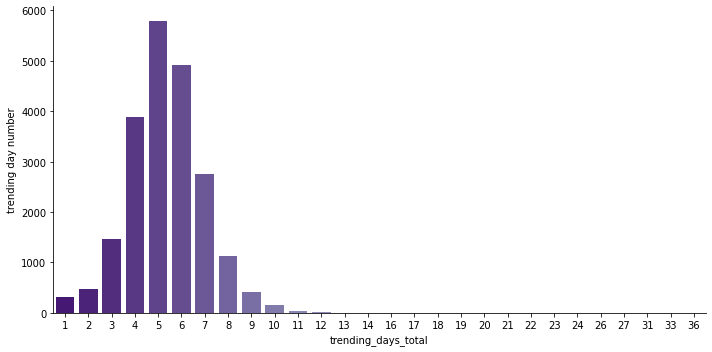

In [ ]:
trendingday_video_count = Trending_day_count.groupby("trending_days_total").size().reset_index(name="trending day number") \
    .sort_values('trending day number', ascending=False)


sns.catplot(data=trendingday_video_count, x='trending_days_total', y='trending day number',kind='bar',palette='Purples_r' ,ci=None, legend_out=False,aspect =2)

In [ ]:
# Convert all data to numeric type in preparation for prediction
Trending_day_total['publishedYear'] = Trending_day_total.publishedAt.dt.year
Trending_day_total['publishedMonth'] = Trending_day_total.publishedAt.dt.month
Trending_day_total['publishedDay'] = Trending_day_total.publishedAt.dt.day
Trending_day_total['publishedHour'] = Trending_day_total.publishedAt.dt.hour
Trending_day_total['publishedMinute'] = Trending_day_total.publishedAt.dt.minute
Trending_day_total.drop(columns=['video_id', 'trending_date', 'publishedAt'],inplace=True) 
Trending_day_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114606 entries, 0 to 114605
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   view_count           114606 non-null  int64  
 1   likes                114606 non-null  int64  
 2   dislikes             114606 non-null  int64  
 3   comment_count        114606 non-null  int64  
 4   trending_day_no      114606 non-null  float64
 5   trending_days_total  114606 non-null  int64  
 6   publishedYear        114606 non-null  int64  
 7   publishedMonth       114606 non-null  int64  
 8   publishedDay         114606 non-null  int64  
 9   publishedHour        114606 non-null  int64  
 10  publishedMinute      114606 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 10.5 MB


In [ ]:
# seperate trainingset and testset
X = Trending_day_total.drop('trending_days_total',axis=1)
y = Trending_day_total.trending_days_total
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Comparing experiments with multiple models
multi_regre = [linear_model.LinearRegression(),DecisionTreeRegressor(), GradientBoostingRegressor(),RandomForestClassifier(),MLPRegressor()]

In [ ]:
k_fold = 3
max_neg_mean_squared_error = None #越大越好，越接近0
max_r2 = None # 越接近1越好，测试值越等于真实值
best_model_NMSE = None
best_model_r2 = None
for regre in multi_regre:
    kFold = KFold(n_splits=k_fold,random_state=0,shuffle=True)
    scores = cross_validate(regre, X, y, cv=kFold ,scoring=('r2','neg_mean_squared_error'),return_train_score=True)
    print(str(regre)[:25])
    print(scores['test_neg_mean_squared_error'].mean())
    print(scores['test_r2'].mean())
    if max_neg_mean_squared_error == None:
      max_neg_mean_squared_error = scores['test_neg_mean_squared_error'].mean()
      max_r2 = scores['test_r2'].mean()
      best_model_NMSE = str(regre)[:25]
      best_model_r2 = str(regre)[:25]
    else:
      if scores['test_neg_mean_squared_error'].mean() > max_neg_mean_squared_error:
        max_neg_mean_squared_error = scores['test_neg_mean_squared_error'].mean()
        best_model_NMSE = str(regre)[:25]
      if scores['test_r2'].mean() > max_r2:
        max_r2 = scores['test_r2'].mean()
        best_model_r2 = str(regre)[:25]

print("best_model_NMSE", best_model_NMSE, max_neg_mean_squared_error)
print("best_model_r2",best_model_r2, max_r2)

LinearRegression()
-3.0959449609286924
0.34291382786516245
DecisionTreeRegressor()
-1.9938223129679074
0.5765959807161364
GradientBoostingRegressor
-1.9198834528712905
0.5923899162943321
RandomForestClassifier()
-0.808587683018341
0.8283771599108674
MLPRegressor()
-7491342.032310921
-1585697.6995799632
best_model_NMSE RandomForestClassifier() -0.808587683018341
best_model_r2 RandomForestClassifier() 0.8283771599108674


- It can be found that the effect of RandomForestClassifier() is the best.
- R2_score = 1, the predicted value and the true value in the sample are exactly equal. R2_score = 0, each predicted value of the sample is equal to the mean.
And neg_mean_squared_error corresponds to the inverse of the mean squared error. The smaller its absolute value, the better.

In [ ]:
## idea 美国的数据去估计印度的可不可行呢